In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [4]:
def generate_complex_signal(duration, components,sampling_frequency=100.0,plot=False):
    """
    Generate a complex signal as a combination of multiple sinusoidal components.

    Parameters:
        duration (float): Duration of the signal in seconds.
        components (list of tuples): List of tuples, where each tuple contains:
            - amplitude (float): Amplitude of the sinusoid component.
            - frequency (float): Frequency of the sinusoid component in Hertz.
            - phase_offset (float): Phase offset of the sinusoid component in radians.

    Returns:
        numpy.ndarray: Generated complex signal.
        numpy.ndarray: Corresponding time vector.
    """
    t = np.arange(0, duration, 1 / sampling_frequency)
    signal = np.zeros_like(t)

    for amp, freq, phase in components:
        signal += amp * np.sin(2 * np.pi * freq * t + phase)

    if plot:
        # Plot the complex signal
        plt.figure(figsize=(12, 4))
        plt.plot(t, signal,label=f'Sampled at {sampling_frequency} Hz')
        plt.title('Generated Complex Signal')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.xlim(t.min(), t.max())
        plt.legend()
        plt.grid(True)
        plt.show()

    return signal, t



# Adding noise

In [30]:
import numpy as np

def add_gaussian_noise(timeseries, desired_snr_db):
    """
    Add Gaussian noise to a time series to achieve a desired SNR.

    :param timeseries: Original time series data (numpy array).
    :param desired_snr_db: Desired Signal-to-Noise Ratio (SNR) in decibels.
    :return: Time series with added Gaussian noise.
    """
    # Calculate the power of the original signal
    signal_power = np.mean(timeseries ** 2)

    # Convert SNR from dB to linear scale
    snr_linear = 10 ** (desired_snr_db / 10)

    # Calculate the desired noise power for the given SNR
    noise_power = signal_power / snr_linear

    # Determine the standard deviation of the noise
    noise_std = np.sqrt(noise_power)

    # Generate Gaussian noise
    noise = np.random.normal(0, noise_std, len(timeseries))

    # Add noise to the original signal
    noisy_timeseries = timeseries + noise

    return noisy_timeseries


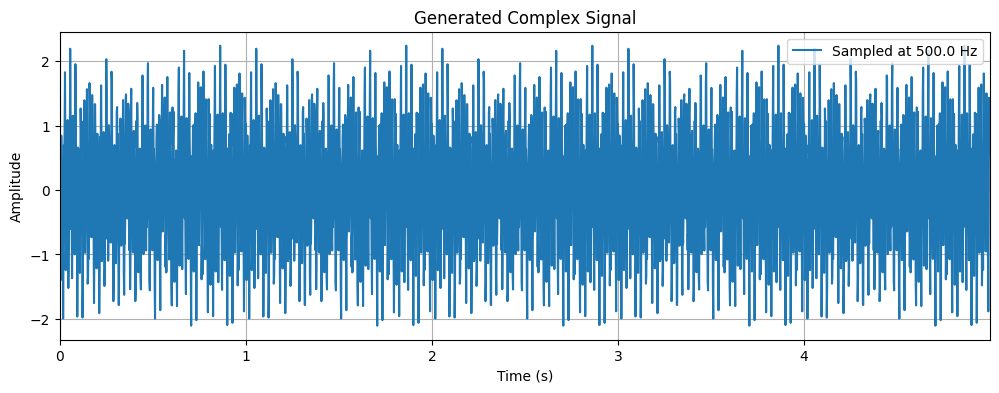

In [31]:
components = [
    (1.0, 433, 0.0),
    (0.75, 144, np.pi / 4),
    (0.5, 36, np.pi / 2),
]

sampling_frequency = 500.0
signal, t  = generate_complex_signal(duration=5,components=components,sampling_frequency=sampling_frequency,plot=True)

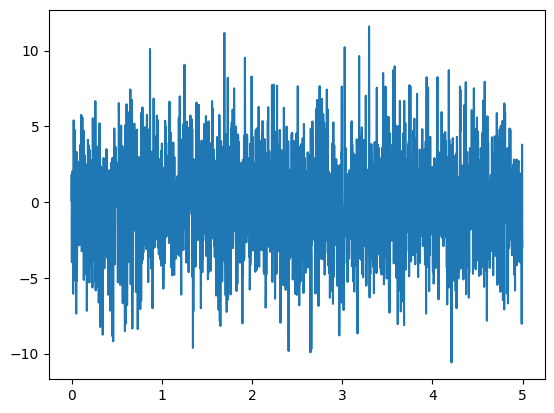

In [66]:
#Adding noise to signal, with signal to noise ratio in dB
signal_with_noise = add_gaussian_noise(signal,-10)

plt.plot(t,signal_with_noise)

# Using np.fft.fft

Text(0, 0.5, 'PSD [V**2/Hz]')

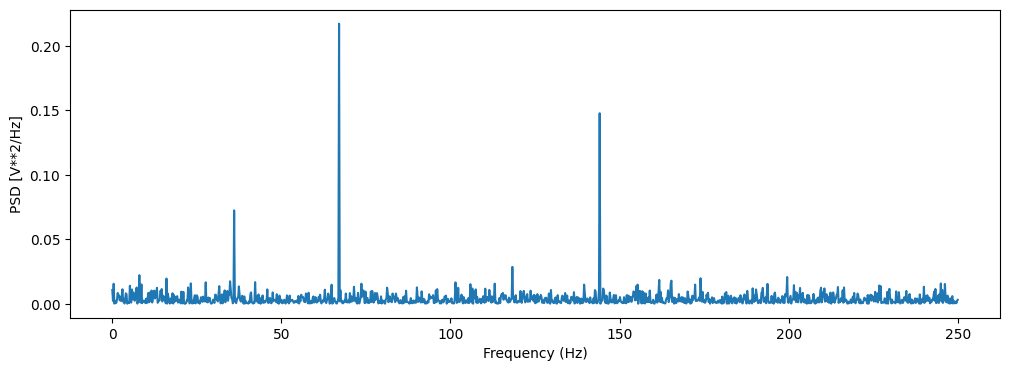

In [67]:

xF = np.fft.fft(signal_with_noise)
N = len(xF)
xF = xF[0:N//2] / N
fr = np.linspace(0,sampling_frequency//2,N//2)

plt.figure(figsize=(12, 4))
plt.plot(fr,abs(xF)**2)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD [V**2/Hz]')

# Using Welsh's method

## With low noise

Text(0.5, 0, 'Frequency (Hz)')

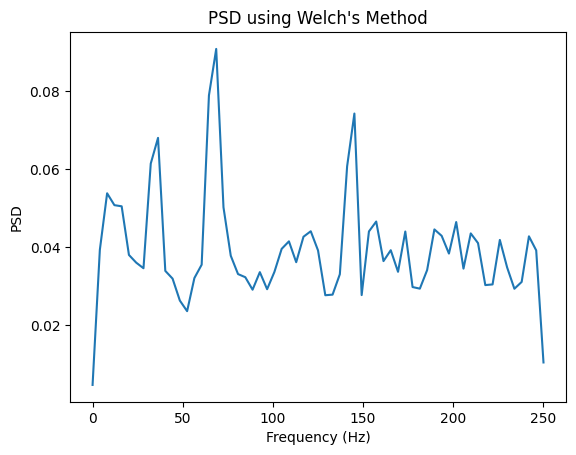

In [88]:
fr_welch, psd_welch = welch(signal_with_noise, fs=sampling_frequency,nperseg=124)
plt.plot(fr_welch,psd_welch)
plt.title('PSD using Welch\'s Method')
plt.ylabel('PSD')
plt.xlabel('Frequency (Hz)')


Try changing the nperseg argument of welch(). 

* What is nperseg ? chech online help or manual 
* What do you notice ? 
* What can you say about the resolution?
* How wide are the peaks of your signal frequencies ? 
* How is the noise behaving ? 

## With high noise

Text(0.5, 0, 'Frequency (Hz)')

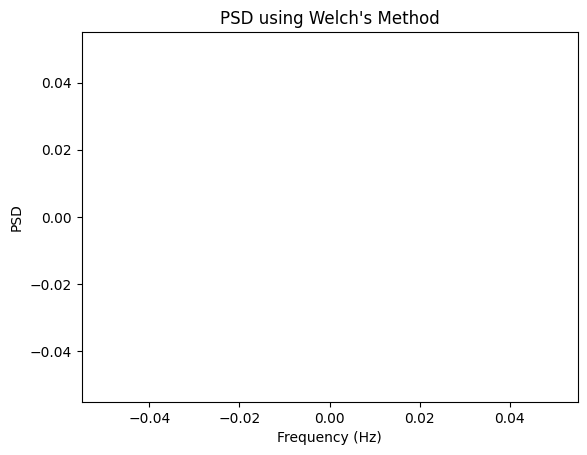

In [199]:
#Adding noise to signal, with signal to noise ratio in dB
signal, t  = generate_complex_signal(duration=5,components=components,sampling_frequency=sampling_frequency,plot=False)

signal_with_high_noise = add_gaussian_noise(signal,-20)

# change nperseg to what you have found to be a good value
fr_welch, psd_welch = welch(signal_with_high_noise, fs=sampling_frequency,nperseg=1)
plt.plot(fr_welch,psd_welch)
plt.title('PSD using Welch\'s Method')
plt.ylabel('PSD')
plt.xlabel('Frequency (Hz)')

* change nperseg as well here, is the optimal nperseg the same as in the low noise case ? 

# Comparison of the 3 PSD methods

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def compare_psd_methods(sinusoid_signal, sampling_frequency):
    """
    Compares three PSD calculation methods: FFT, periodogram, and Welch's method.

    :param sinusoid_signal: Sinusoidal signal data (numpy array).
    :param sampling_frequency: Sampling frequency of the signal.
    """
    # Method 1: FFT
    xF = np.fft.fft(sinusoid_signal)
    N = len(xF)
    xF = xF[0:N//2] / N
    fr = np.linspace(0, sampling_frequency // 2, N // 2)
    psd_fft = np.abs(xF) ** 2

    # Method 2: Periodogram
    f_per, psd_per = signal.periodogram(sinusoid_signal, sampling_frequency)

    # Method 3: Welch's method
    f_welch, psd_welch = signal.welch(sinusoid_signal, sampling_frequency)

    # Plotting
    plt.figure(figsize=(15, 5))

    # FFT
    plt.subplot(3, 1, 1)
    plt.plot(fr, psd_fft)
    plt.title('PSD using FFT')
    plt.ylabel('PSD')

    # Periodogram
    plt.subplot(3, 1, 2)
    plt.plot(f_per, psd_per)
    plt.title('PSD using Periodogram')
    plt.ylabel('PSD')

    # Welch
    plt.subplot(3, 1, 3)
    plt.plot(f_welch, psd_welch)
    plt.title('PSD using Welch\'s Method')
    plt.ylabel('PSD')

    plt.tight_layout()
    plt.show()


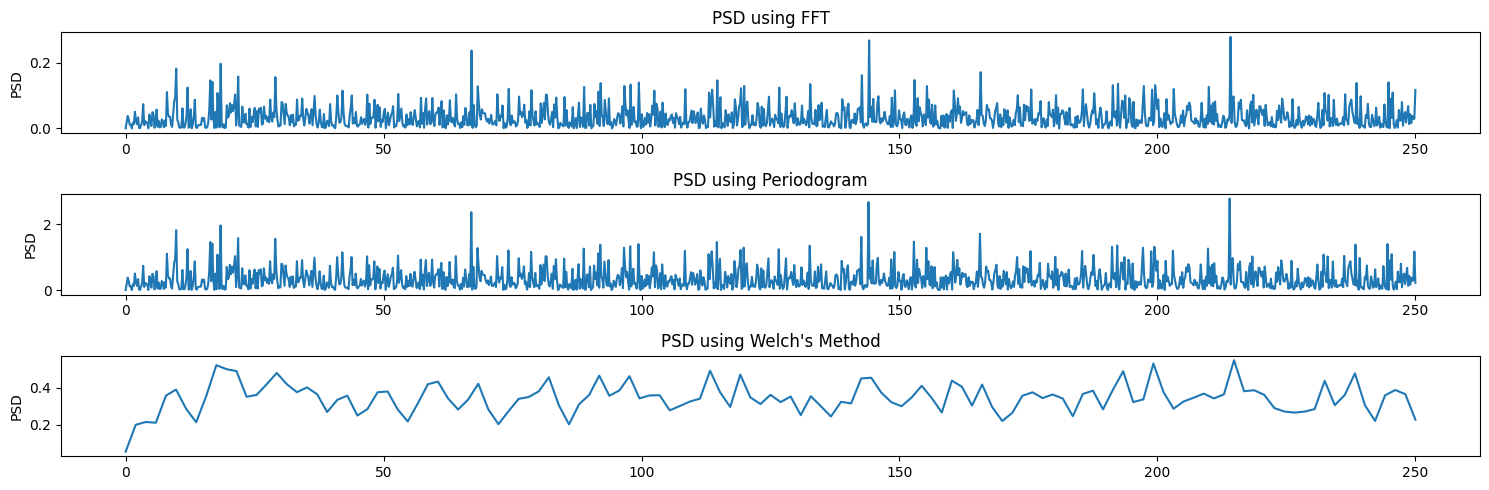

In [106]:
compare_psd_methods(signal_with_high_noise,sampling_frequency)

Which method words 'the best' ? 

* What do you mean by 'the best' ?
* if you had to find the 3 frequencies of a random signal like described here, which method would you use ?
* Don't forget to change the arguments of Welch's method & periodogram.

# A different kind of signal 

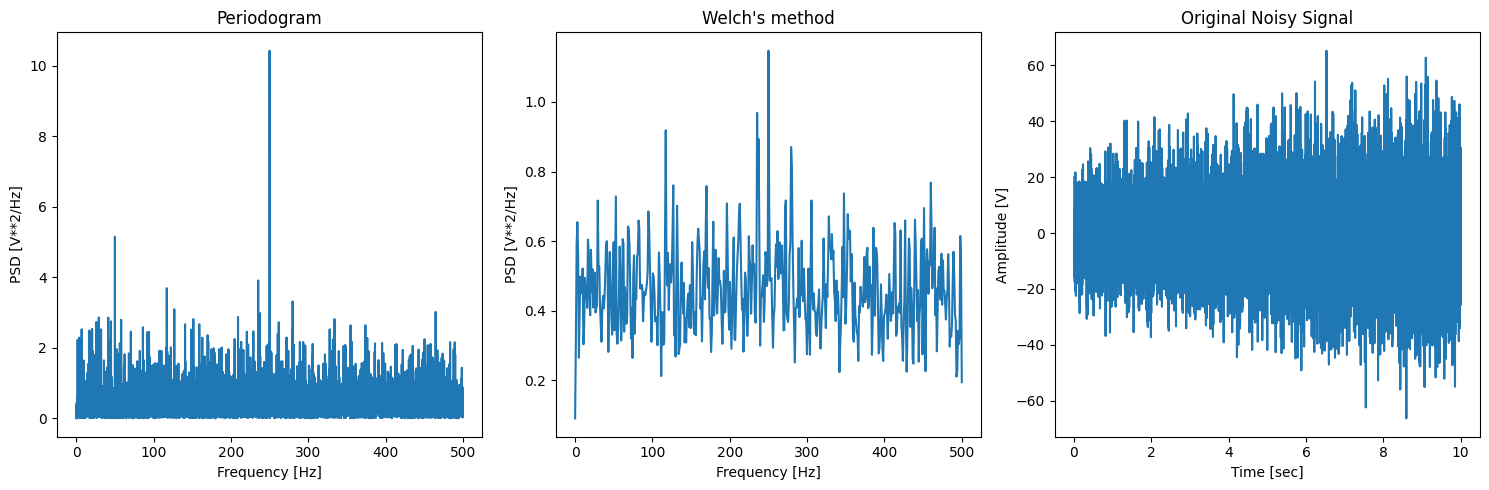

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Create a signal with varying noise levels
fs = 1000  # Sampling frequency
t = np.linspace(0, 10, 10 * fs)  # Time vector for 10 seconds

# Create a clean signal with two different frequencies
clean_signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 250 * t)

# Add varying noise
noise_level = np.interp(t, [t[0], t[-1]], [10, 20])  # Noise level increases with time
noisy_signal = clean_signal + noise_level * np.random.normal(size=t.shape)

# Calculate the PSD using the periodogram (which will not handle the non-stationarity well)
f_per, Pxx_per = signal.periodogram(noisy_signal, fs)

# Calculate the PSD using Welch's method (which will handle the non-stationarity better)
nperseg = 1024  # Segment length
f_welch, Pxx_welch = signal.welch(noisy_signal, fs, nperseg=nperseg)

# Plot the results
plt.figure(figsize=(15, 5))

# Plot the periodogram
plt.subplot(1, 3, 1)
plt.plot(f_per, Pxx_per)
plt.title('Periodogram')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

# Plot Welch's method
plt.subplot(1, 3, 2)
plt.plot(f_welch, Pxx_welch)
plt.title("Welch's method")
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')

# Plot the original noisy signal
plt.subplot(1, 3, 3)
plt.plot(t, noisy_signal)
plt.title("Original Noisy Signal")
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [V]')

plt.tight_layout()
plt.show()


* What are the frequencies in the signal ?
* How would you describe the noise ?
* Which method works best ?
* Can you improve on the welch method by using different parameters ? see online help for the list of parameters the welch function can accept. 

# Windows

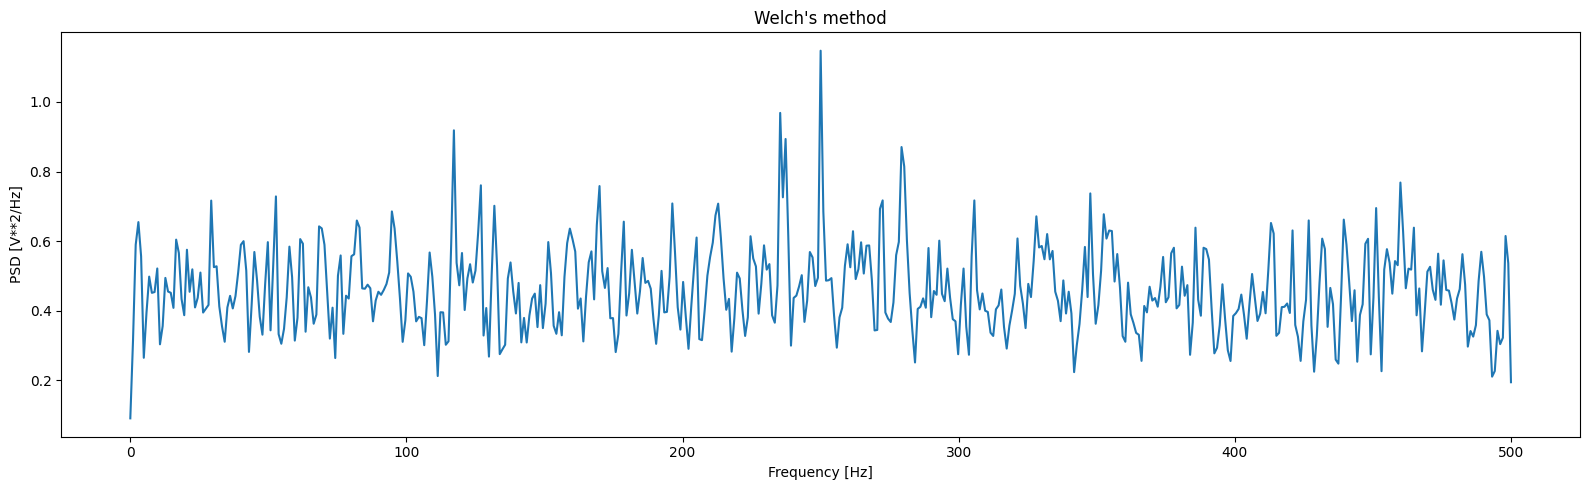

In [126]:
f_welch, Pxx_welch = signal.welch(noisy_signal, fs, nperseg=nperseg)
# Plot Welch's method
plt.figure(figsize=(16, 5))
plt.plot(f_welch, Pxx_welch)
plt.title("Welch's method")
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.tight_layout()

/var/folders/qp/t_y7n0d14pndrs1d5r5cz73w0000gn/T/ipykernel_13907/228699385.py:7: DeprecationWarning: Importing boxcar from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.boxcar' or the convenience function 'scipy.signal.get_window' instead.
  'Rectangular (Boxcar)': signal.boxcar(fs),


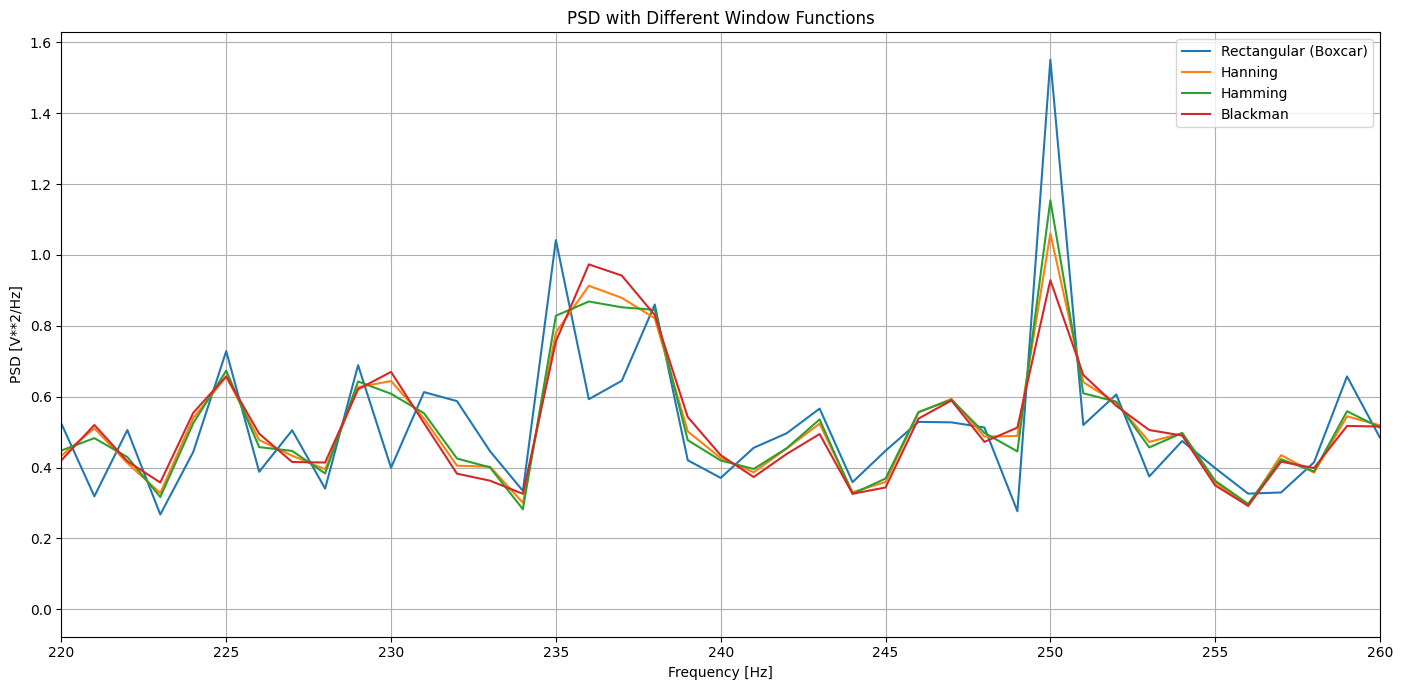

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define window functions to compare
windows = {
    'Rectangular (Boxcar)': signal.boxcar(fs),
    'Hanning': signal.windows.hann(fs),
    'Hamming': signal.windows.hamming(fs),
    'Blackman': signal.windows.blackman(fs),
}

# Plot the PSD for each window function
plt.figure(figsize=(14, 7))
for window_name, window in windows.items():
    f, Pxx = signal.welch(noisy_signal, fs, window=window, nperseg=fs)
    plt.plot(f, Pxx, label=window_name)

plt.title('PSD with Different Window Functions')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xlim(220,260)
plt.show()


* Discuss the frequency resolution depending on the window
* Discuss the spectral leakage and the amplitude depending on the window
* Try other windows, see online manual in scipy.signal.windows

# Noise colours 

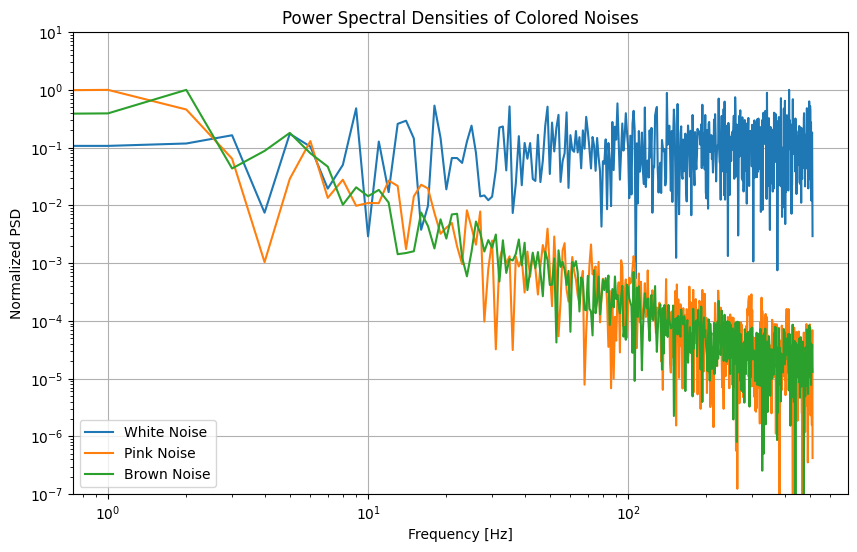

In [135]:
import numpy as np
import matplotlib.pyplot as plt

def generate_colored_noise(num_samples, sampling_rate):
    """
    Generate different colors of noise and plot their PSD.

    :param num_samples: Number of samples of the noise signal.
    :param sampling_rate: Sampling rate of the noise signal.
    """
    # Generate white noise
    white_noise = np.random.normal(0, 1, num_samples)
    
    # Generate pink noise
    # Pink noise has a -3 dB/octave PSD slope.
    # This can be generated by integrating white noise (which will give a -6 dB/octave slope)
    # and then applying a sqrt to adjust the slope to -3 dB/octave.
    uneven = np.arange(1, num_samples+1, 2)
    pink_noise = np.cumsum(np.random.normal(0, np.sqrt(np.arange(1, num_samples+1)), num_samples))
    pink_noise -= np.average(pink_noise)
    
    # Generate brown noise
    # Brown noise has a -6 dB/octave PSD slope, which can be generated by integrating white noise.
    brown_noise = np.cumsum(white_noise)
    brown_noise -= np.average(brown_noise)

    # FFT and PSD calculations
    freqs = np.fft.rfftfreq(num_samples, 1/sampling_rate)
    
    white_fft = np.fft.rfft(white_noise)
    pink_fft = np.fft.rfft(pink_noise)
    brown_fft = np.fft.rfft(brown_noise)
    
    white_psd = np.abs(white_fft) ** 2
    pink_psd = np.abs(pink_fft) ** 2
    brown_psd = np.abs(brown_fft) ** 2

    # Normalize PSD for plotting
    white_psd /= np.max(white_psd)
    pink_psd /= np.max(pink_psd)
    brown_psd /= np.max(brown_psd)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.loglog(freqs, white_psd, label='White Noise')
    plt.loglog(freqs, pink_psd, label='Pink Noise')
    plt.loglog(freqs, brown_psd, label='Brown Noise')
    
    plt.title('Power Spectral Densities of Colored Noises')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Normalized PSD')
    plt.legend()
    plt.grid(True)
    plt.ylim(1e-7,10)
    plt.show()

# Example usage
generate_colored_noise(1024, 1024)


## real case noise with LIGO

In [141]:
LIGO_data = np.load('LIGO_noise.npy')

In [158]:
def compare_psd_methods_loglog(sinusoid_signal, sampling_frequency):
    """
    Compares three PSD calculation methods: FFT, periodogram, and Welch's method.

    :param sinusoid_signal: Sinusoidal signal data (numpy array).
    :param sampling_frequency: Sampling frequency of the signal.
    """
    # Method 1: FFT
    xF = np.fft.fft(sinusoid_signal)
    N = len(xF)
    xF = xF[0:N//2] / N
    fr = np.linspace(0, sampling_frequency // 2, N // 2)
    psd_fft = np.abs(xF) ** 2

    # Method 2: Periodogram
    f_per, psd_per = signal.periodogram(sinusoid_signal, sampling_frequency)

    # Method 3: Welch's method
    f_welch, psd_welch = signal.welch(sinusoid_signal, sampling_frequency)

    # Plotting
    plt.figure(figsize=(15, 5))

    # FFT
    plt.subplot(3, 1, 1)
    plt.loglog(fr, psd_fft)
    plt.title('PSD using FFT')
    plt.ylabel('PSD')
    plt.xlim(10,2048)

    # Periodogram
    plt.subplot(3, 1, 2)
    plt.loglog(f_per, psd_per)
    plt.title('PSD using Periodogram')
    plt.ylabel('PSD')
    plt.xlim(10,2048)

    # Welch
    plt.subplot(3, 1, 3)
    plt.loglog(f_welch, psd_welch)
    plt.title('PSD using Welch\'s Method')
    plt.ylabel('PSD')
    plt.xlim(10,2048)

    plt.show()


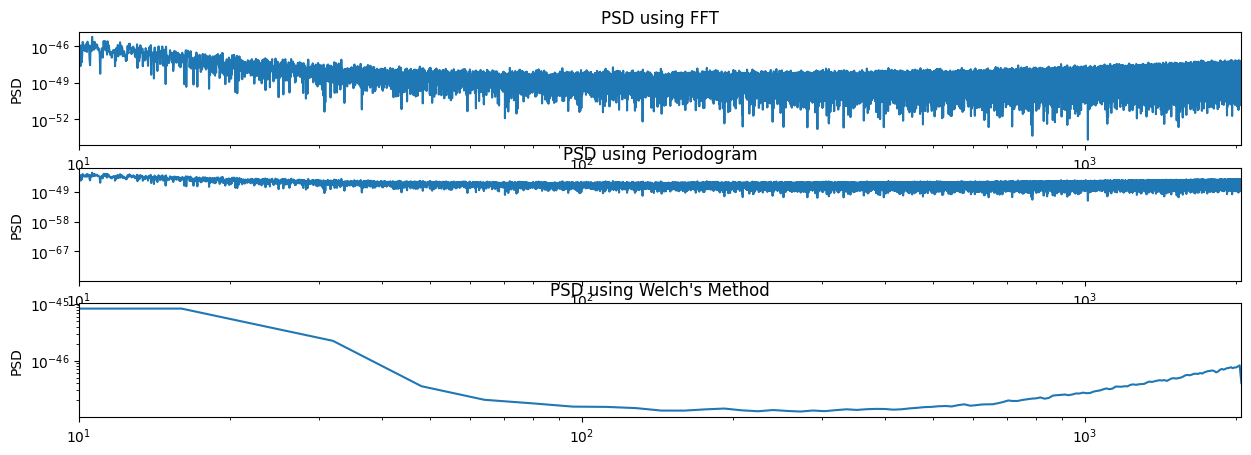

In [159]:
compare_psd_methods_loglog(LIGO_data,4096)

* What kind of noise is this most closely related to ?
* Which method is the 'best' ? why ?
* Don't forget to change the default parameters if Periodogram and Welch ! 

# with a transient signal 

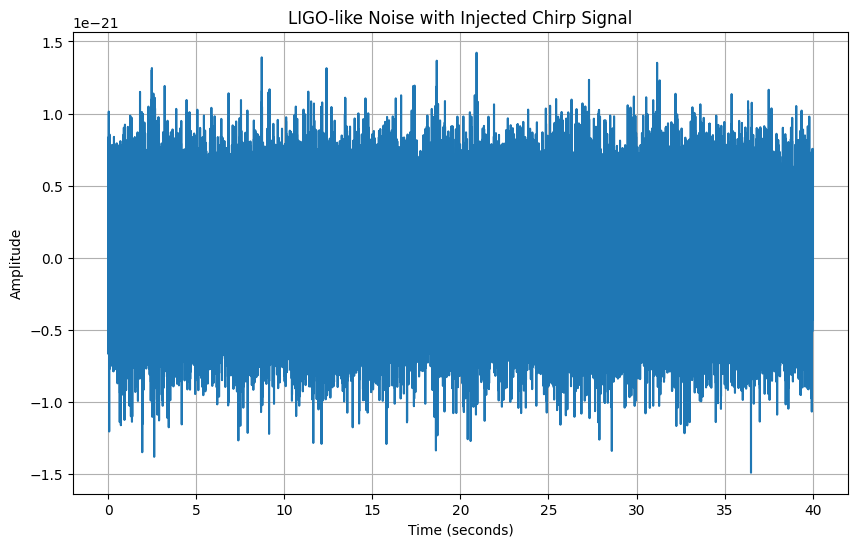

In [180]:
import numpy as np
from scipy.signal import chirp
import matplotlib.pyplot as plt

# Parameters for your LIGO-like noise and chirp
sampling_rate = 4096  # in Hz
duration = 40  # total duration in seconds
chirp_duration = 10  # chirp duration in seconds
chirp_start = 25  # start time of chirp in seconds
initial_freq = 60  # starting frequency of chirp in Hz
final_freq = 400  # final frequency of chirp in Hz

noise = LIGO_data

# Generate the chirp signal
t_chirp = np.linspace(0, chirp_duration, int(chirp_duration * sampling_rate))
chirp_signal = 500*np.mean(noise)*chirp(t_chirp, f0=initial_freq, f1=final_freq, t1=chirp_duration, method='linear')

# Inject the chirp into the noise
# First, create a time array for the entire signal
t_total = np.linspace(0, duration, int(duration * sampling_rate))

# Then, create a signal array that is zero everywhere except where the chirp is
injected_signal = np.zeros_like(t_total)
injected_signal[int(chirp_start * sampling_rate):int((chirp_start + chirp_duration) * sampling_rate)] = chirp_signal

# Add the chirp to the noise
combined_signal = noise + injected_signal

# Plot the combined signal
plt.figure(figsize=(10, 6))
plt.plot(t_total, combined_signal)
plt.title('LIGO-like Noise with Injected Chirp Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


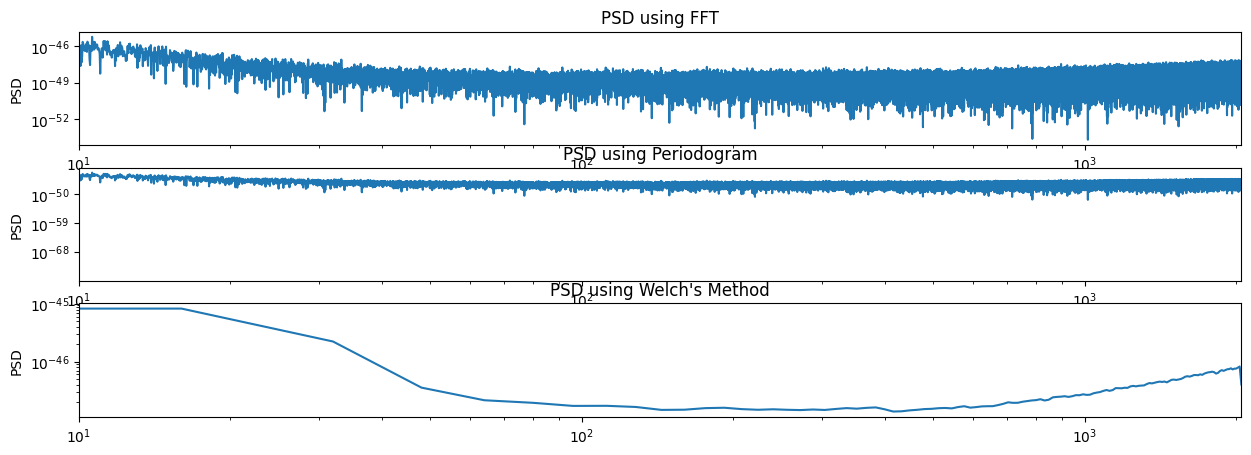

In [181]:
compare_psd_methods_loglog(combined_signal,4096)

* Where is the signal ? can you find a way to show it with any method ?


# spectrograms for transient signals 

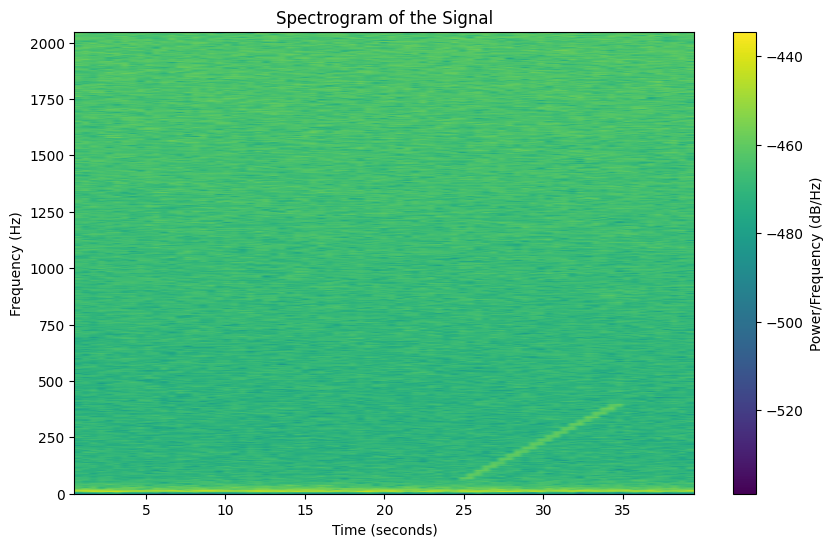

In [183]:
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

# Assuming 'combined_signal' is your signal that includes the LIGO-like noise and the injected chirp
# And 'sampling_rate' is the sampling rate of your signal

# Parameters for the STFT
nperseg = sampling_rate  # Window length for STFT (1 second)
noverlap = nperseg // 2  # 50% overlap
nfft = nperseg  # Number of FFT points, equal to window length for better resolution

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(combined_signal, fs=sampling_rate, nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', origin='lower', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.show()


* here, we used successive STFT of 1 seconds, to generate PSDs and plot them as columns.
* Can you change the parameters to make the signal more apparent ?
* Could you use another method that STFT ? like fft or periodogram ? example below. 

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram

# Assuming combined_signal is your signal and fs is the sampling rate
fs = 4096  # Hz
signal_length = len(combined_signal) / fs  # Length of the signal in seconds

# Define your time interval for the analysis (in seconds)
time_interval = 1  # For example, 1 second

# Calculate the number of intervals
num_intervals = int(np.floor(signal_length / time_interval))

# Initialize BIG_PSD
BIG_PSD = []

# Loop over the signal in time intervals and compute the PSD
for i in range(num_intervals):
    start_idx = int(i * time_interval * fs)
    end_idx = int((i + 1) * time_interval * fs)
    segment = combined_signal[start_idx:end_idx]

    # Compute the PSD for this segment

    # Use any function you want (np.fft, periodogram, welch', others...)
    # the function should return the amplitude at each frequency (in variable Pxx)
    # you can sue the sampling rate fs
    f, Pxx = REPLACE_ME
    BIG_PSD.append(Pxx)

# Convert BIG_PSD to a numpy array
BIG_PSD = np.array(BIG_PSD)

# Plotting the BIG_PSD using imshow
plt.figure(figsize=(10, 6))
plt.imshow(np.log10(np.swapaxes(BIG_PSD,0,1)), aspect='auto', extent=[0, max(f), 0, signal_length], origin='lower', cmap='viridis')
plt.colorbar(label='Log10(PSD)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title('Spectrogram of the Signal')
plt.show()


NameError: name 'REPLACE_ME' is not defined